In [14]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, LSTM

#from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')

In [15]:
df = pd.read_csv('New_AAPL.csv')
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...,...
9106,2017-01-25,30.105000,30.525000,30.070000,30.469999,28.644361,129510400
9107,2017-01-26,30.417500,30.610001,30.400000,30.485001,28.658466,105350400
9108,2017-01-27,30.535000,30.587500,30.400000,30.487499,28.660812,82251600
9109,2017-01-30,30.232500,30.407499,30.165001,30.407499,28.585606,121510000


In [16]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)
  df['Date'] = df['Date'].apply(str_to_datetime)
  df['Date']
#datetime_object = str_to_datetime('1981-01-02')
#datetime_object

In [17]:
df.index = df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600
...,...,...,...,...,...,...
2017-01-25,30.105000,30.525000,30.070000,30.469999,28.644361,129510400
2017-01-26,30.417500,30.610001,30.400000,30.485001,28.658466,105350400
2017-01-27,30.535000,30.587500,30.400000,30.487499,28.660812,82251600


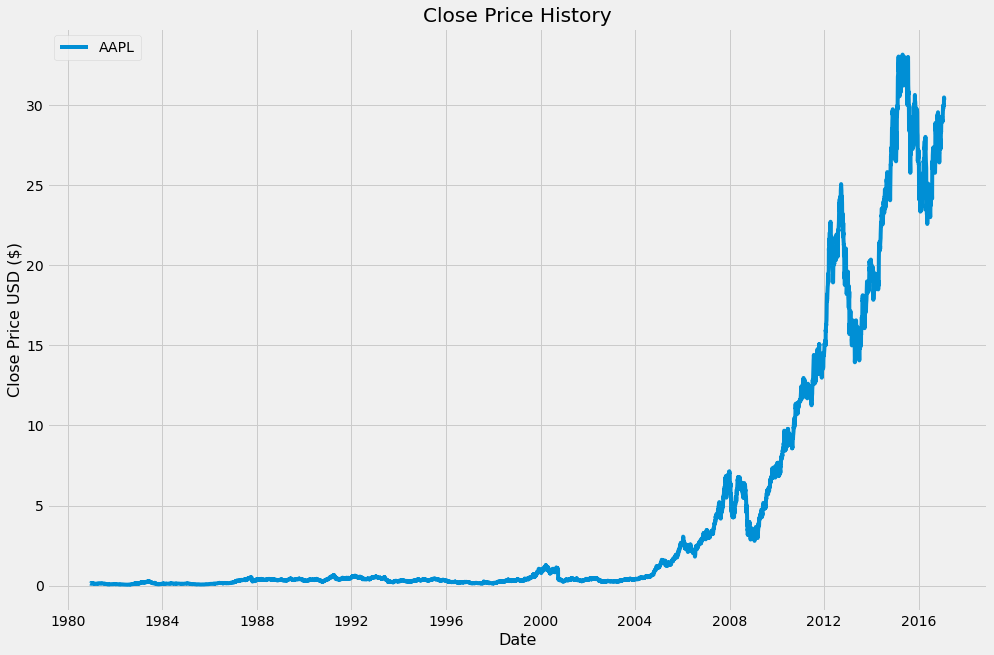

In [18]:
plt.figure(figsize = (15,10))

plt.title('Close Price History')
plt.plot(df.index, df['Close'], label='AAPL')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)

plt.legend(loc='upper left')
plt.show()

In [19]:
#Membuat sebuah dataframe dengan hanya kolom 'Close'
data = df.filter(['Close'])

#Mengkonversi dataframe kebentuk numpy array
dataset = data.values

#Mendapat /Mengkomputasi angka dari baris ke dalam model train
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

7289

In [20]:
#Scale data dengan range 0-1 [Preprocessing]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00239302],
       [0.00219081],
       [0.00192116],
       ...,
       [0.919217  ],
       [0.91680106],
       [0.91468714]])

In [21]:
#Membuat training data set dari scaled_data yang telah di normalisasi
train_data = scaled_data[0:training_data_len, :]

#Split data menjadi x_train dan y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)

[array([0.00239302, 0.00219081, 0.00192116, 0.00200541, 0.00210655,
       0.00232562, 0.00251098, 0.00267952, 0.00289859, 0.00330304,
       0.00337045, 0.00325249, 0.00311768, 0.00316823, 0.00306713,
       0.00286488, 0.00267952, 0.00259526, 0.00281433, 0.00278063,
       0.00262897, 0.00264582, 0.00273007, 0.00269637, 0.00294914,
       0.00281433, 0.00289859, 0.00294914, 0.00293229, 0.00286488,
       0.00283118, 0.00269637, 0.00254471, 0.00232562, 0.00210655,
       0.00224136, 0.00237617, 0.00237617, 0.00239302, 0.00219081,
       0.00219081, 0.00207285, 0.00203911, 0.00195486, 0.00203911,
       0.00219081, 0.00197171, 0.00178635, 0.0018369 , 0.00171894,
       0.00192116, 0.00197171, 0.0020897 , 0.00210655, 0.002056  ,
       0.00202226, 0.00200541, 0.00197171, 0.00170209, 0.0015504 ])]
[0.0014324416366780438]


In [22]:
#Convert x_train dan y_train ke numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [23]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1] ,1))
x_train.shape

(7229, 60, 1)

In [24]:
#Membangun Model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
7229/7229 [==============================] - 107s 15ms/step - loss: 5.6169e-05
Epoch 2/10
7229/7229 [==============================] - 104s 14ms/step - loss: 2.0089e-05
Epoch 3/10
7229/7229 [==============================] - 104s 14ms/step - loss: 1.6395e-05
Epoch 4/10
7229/7229 [==============================] - 105s 14ms/step - loss: 1.2364e-05
Epoch 5/10
7229/7229 [==============================] - 105s 15ms/step - loss: 1.0871e-05
Epoch 6/10
7229/7229 [==============================] - 108s 15ms/step - loss: 8.8246e-06
Epoch 7/10
7229/7229 [==============================] - 105s 14ms/step - loss: 9.5431e-06
Epoch 8/10
7229/7229 [==============================] - 105s 14ms/step - loss: 8.5295e-06
Epoch 9/10
7229/7229 [==============================] - 102s 14ms/step - loss: 7.9709e-06
Epoch 10/10
7229/7229 [==============================] - 108s 15ms/step - loss: 7.3975e-06


In [26]:
#Membuat testing data set
test_data = scaled_data[training_data_len - 60: , :]

#Membuat data sets x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0]) 
  

In [27]:
#Convert data ke numpy array
x_test = np.array(x_test)

In [28]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
#Membuat variabel predictions dari price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
#Mendapatkan hasil root mean squared error (RMSE)
MSE = np.square(np.subtract(predictions,y_test)).mean()  
RMSE = math.sqrt(MSE)

print('Akurasi MSE : ', round(MSE,5))
print('Akurasi RMSE : ', round(RMSE, 5))

Akurasi MSE :  15.42647
Akurasi RMSE :  3.92765


In [31]:
#Plot data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-31-86e4c84d35be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


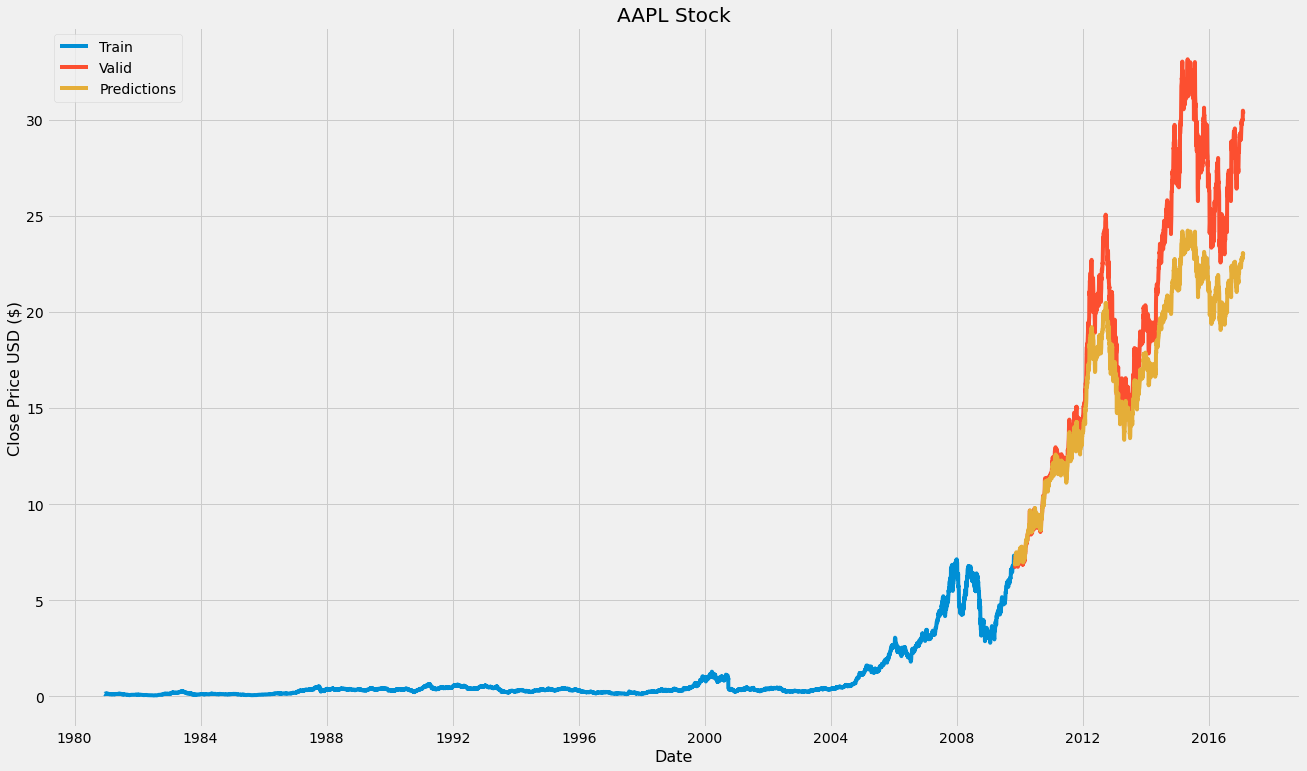

In [32]:
#Visualisasi data
plt.figure(figsize=(20,12))

plt.title('AAPL Stock')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price USD ($)', fontsize=16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='upper left')
plt.show()

In [33]:
#Menunjukan sample hasil valid dan prediksi harga
valid

,Close,Predictions
Date,,
2009-11-02,6.761071,6.852375
2009-11-03,6.741071,6.909885
2009-11-04,6.814643,6.865227
2009-11-05,6.929643,6.940144
2009-11-06,6.940714,7.043291
...,...,...
2017-01-25,30.469999,22.807188
2017-01-26,30.485001,23.079176
2017-01-27,30.487499,23.017881
